<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal_CasiFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings;
warnings.simplefilter('ignore')

In [4]:
import prophet
from prophet import Prophet

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [6]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [7]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [9]:
df = pd.read_csv('REC4.csv',parse_dates=True,index_col=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [11]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [12]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [13]:
df.index.year.unique()

Int64Index([2022, 2023], dtype='int64', name='FECHA')

In [14]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [15]:
df_int = df[df.NOMBRE=='Internac'][['NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_int ['traff_x1000']= df_int.TRAFICO/1000 # transform 
df_int ['qty_x1000']= df_int.CANT/1000 # transform 
df_int['part_of_the_week']=df_int.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')
df_int['part_of_the_week_2']=df_int.index.weekday.map(lambda x: 'Promo_day' if x == 0 or x > 3 else 'Normal_day')
df_int['day_name']=df_int.index.day_name()
df_int['month_name'] = df_int.index.month_name()
df_int['year'] = df_int.index.year
df_int['month'] = df_int.index.month
df_int['day']=df_int.index.day
df_int['ds']= df_int['year'].apply('{:0>2d}'.format) +'-' + df_int['month'].apply('{:0>2d}'.format)+'-'+df_int['day'].apply('{:0>2d}'.format) # To create a format mm-dd

In [16]:
df_int.index.duplicated().sum()

0

In [17]:
df_int

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds
FECHA,,,,,,,,,,,,,,,
2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022,11,1,2022-11-01
2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022,11,2,2022-11-02
2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022,11,3,2022-11-03
2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022,11,4,2022-11-04
2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022,11,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,Weekday,Promo_day,Monday,May,2023,5,8,2023-05-08
2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,Weekday,Normal_day,Tuesday,May,2023,5,9,2023-05-09
2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,Weekday,Normal_day,Wednesday,May,2023,5,10,2023-05-10


In [18]:
#pred = df_int[(df_int.day_name=='Monday')][['qty_x1000','ds']]
pred = df_int[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [19]:
pred = pred.reset_index(drop=True)

In [20]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


In [21]:
pred.describe()

,y
count,193.000000
mean,1472.429694
std,389.264361
min,315.709000
25%,1076.496000
50%,1641.115000
75%,1789.820000
max,2272.792000


In [22]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       193 non-null    float64
 1   ds      193 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [23]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/ks5lva71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdumh_uj4/dp0tvlxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26728', 'data', 'file=/tmp/tmpdumh_uj4/ks5lva71.json', 'init=/tmp/tmpdumh_uj4/dp0tvlxx.json', 'output', 'file=/tmp/tmpdumh_uj4/prophet_model8zwdc8n5/prophet_model-20230528031757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:17:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:17:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1218.886986,802.151658,1392.856078,1218.886986,1218.886986,-104.673054,-104.673054,-104.673054,252.195364,252.195364,252.195364,-356.868418,-356.868418,-356.868418,0.0,0.0,0.0,1114.213932
1,2022-11-02,1218.865364,751.903757,1353.266270,1218.865364,1218.865364,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1055.895461
2,2022-11-03,1218.843742,722.721676,1345.328575,1218.843742,1218.843742,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1037.224343
3,2022-11-04,1218.822121,1436.329925,2048.882600,1218.822121,1218.822121,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1735.606357
4,2022-11-05,1218.800499,1466.670316,2067.044197,1218.800499,1218.800499,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1784.320354


In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
553,2024-05-07,1284.736198,866.387795,1478.092384,1262.343259,1310.132044,-104.673054,-104.673054,-104.673054,252.195364,252.195364,252.195364,-356.868418,-356.868418,-356.868418,0.0,0.0,0.0,1180.063144
554,2024-05-08,1284.868698,800.146273,1444.055601,1262.397790,1310.353168,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1121.898796
555,2024-05-09,1285.001198,781.167321,1397.439742,1262.454186,1310.574292,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1103.381798
556,2024-05-10,1285.133698,1489.346645,2105.506449,1262.510581,1310.795415,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1801.917935
557,2024-05-11,1285.266198,1512.844755,2156.042784,1262.566977,1311.016539,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1850.786053


In [27]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2022-11-01,1114.213932
1,2022-11-02,1055.895461
2,2022-11-03,1037.224343
3,2022-11-04,1735.606357
4,2022-11-05,1784.320354
...,...,...
553,2024-05-07,1180.063144
554,2024-05-08,1121.898796
555,2024-05-09,1103.381798
556,2024-05-10,1801.917935


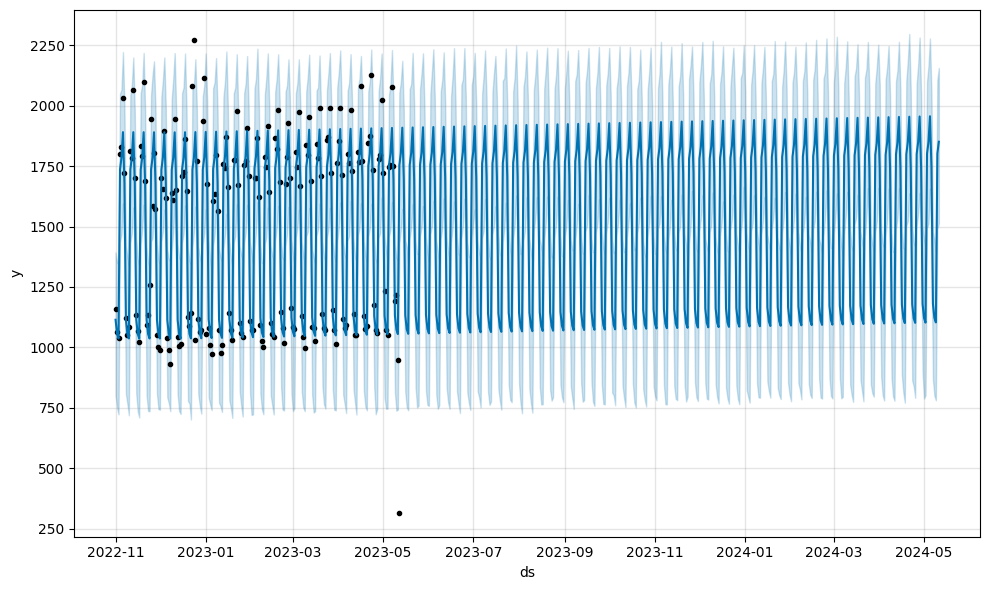

In [28]:
plot1 = m.plot(forecast)

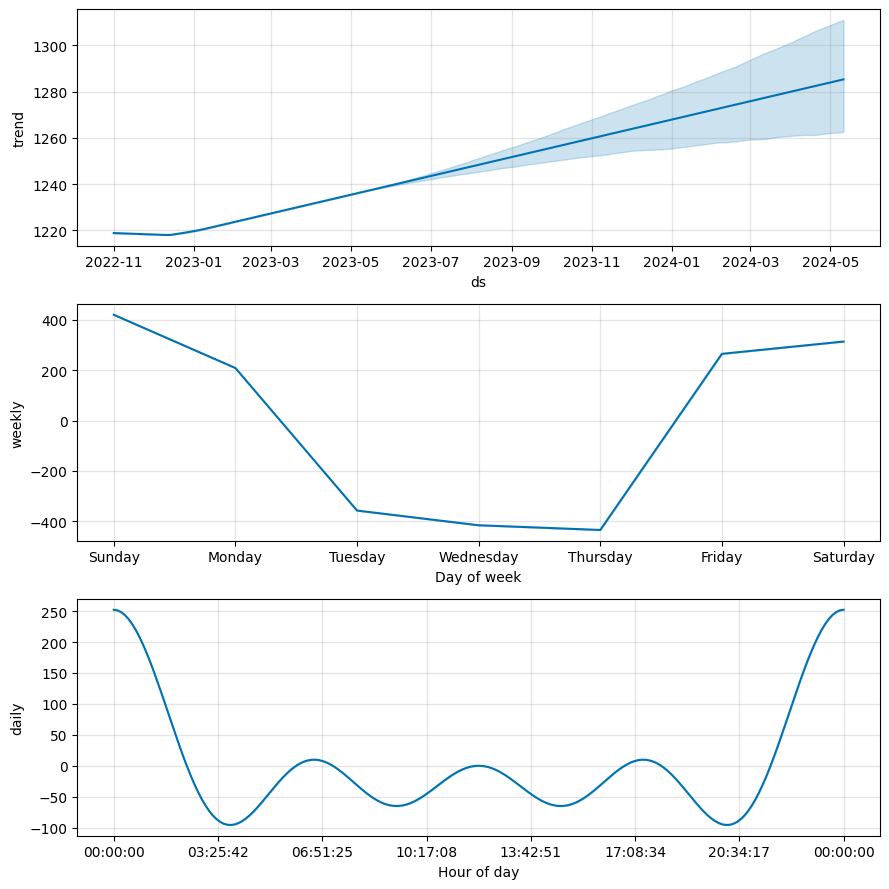

In [29]:
plot2=m.plot_components(forecast)

In [1]:
import pandas as pd

In [31]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [38]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=12068461 sha256=de2ea6ae63f5c251f7fca4545b87cefd45e14a7320daeb263

In [30]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import pandas as pd
from darts import TimeSeries
from darts.models import RegressionModel
from sklearn.linear_model import LinearRegression

In [32]:
y = TimeSeries.from_series(pred['y'])

In [33]:
y_train = y[:-152]

In [34]:
y_train

<TimeSeries (DataArray) (time: 41, component: 1, sample: 1)>
array([[[1157.375]],

       [[1062.818]],

       [[1040.217]],

       [[1800.05 ]],

       [[1830.014]],

       [[2033.155]],

       [[1723.002]],

       [[1122.071]],

       [[1050.5  ]],

       [[1084.024]],

...

       [[1701.927]],

       [[1653.869]],

       [[1894.734]],

       [[1618.976]],

       [[1039.889]],

       [[ 990.276]],

       [[ 933.155]],

       [[1639.98 ]],

       [[1610.322]],

       [[1943.862]]])
Coordinates:
  * time       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 32 33 34 35 36 37 38 39 40
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
model = RegressionModel(
                        lags=[-1,-2,-12],
                        model=LinearRegression()
                       )

In [ ]:
model.fit(series=y_train)

In [ ]:
y_pred = model.predict(n=152, series=y_train)

In [ ]:
y_pred

In [ ]:
y_pred

In [ ]:
# plotting results
y_train.plot(label = "actual")
y_pred.plot(label = "forecasted") # validation data set
plt.legend()


In [ ]:
y_pred.plot(label="Number Of Passengers")
y_train.plot(label="Pounds Of Milk Produced Per Month" )
plt.legend();

In [ ]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=df_int, x='traff_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=df_int,x='traff_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=df_int,x='traff_x1000', ax=axs[1,0])
sns.kdeplot(data=df_int, x='traff_x1000', ax=axs[1,1])
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [ ]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week_2',  hue='part_of_the_week_2',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [ ]:
df_int['two_week_lag_traff'] = df_int['traff'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
df_int ['two_week_lag_traff_x1000']= df_int['two_week_lag_traff']/1000

In [ ]:
df_int.head(16)

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='two_week_lag_traff_x1000', y='traff_x1000', hue='part_of_the_week')

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='qty_x1000', y='traff_x1000', hue='part_of_the_week')

In [ ]:
df_int.describe()

Modelacion de serires de tiempo con Auto_ARIMA

In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from ast import increment_lineno
import pandas as pd
import numpy as np

#Visualizacion de los datos

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

#Visualizamos todas las columnas
pd.set_option('display.max_columns',None)

In [37]:
df_arima=df_int

In [38]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2022-11-01 to 2023-05-12
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NOMBRE              193 non-null    object 
 1   CODIGO              193 non-null    int64  
 2   TRAFICO             193 non-null    int64  
 3   CANT                193 non-null    int64  
 4   DELAY               193 non-null    int64  
 5   traff_x1000         193 non-null    float64
 6   qty_x1000           193 non-null    float64
 7   part_of_the_week    193 non-null    object 
 8   part_of_the_week_2  193 non-null    object 
 9   day_name            193 non-null    object 
 10  month_name          193 non-null    object 
 11  year                193 non-null    int64  
 12  month               193 non-null    int64  
 13  day                 193 non-null    int64  
 14  ds                  193 non-null    object 
dtypes: float64(2), int64(7), object(6)
mem

In [39]:
df_arima.head()

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds
FECHA,,,,,,,,,,,,,,,
2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022,11,1,2022-11-01
2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022,11,2,2022-11-02
2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022,11,3,2022-11-03
2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022,11,4,2022-11-04
2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022,11,5,2022-11-05


In [41]:
df_arima.reset_index(drop=True, inplace=True)
lag_features = ["traff_x1000", "qty_x1000"]
window1 = 3
window2 = 7
window3 = 30



In [42]:
df_rolled_3d = df_arima[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df_arima[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df_arima[lag_features].rolling(window=window3, min_periods=0)

In [43]:
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()



In [44]:
for feature in lag_features:
  df_arima[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

  df_arima[f"{feature}_std_lag{window1}"] = df_mean_3d[feature]
  df_arima[f"{feature}_std_lag{window2}"] = df_mean_7d[feature]
  df_arima[f"{feature}_std_lag{window3}"] = df_mean_30d[feature]

df.fillna(df_arima.mean(), inplace=True)

In [45]:
df_arima.head()

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
0,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022,11,1,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022,11,2,2022-11-02,13.9970,13.99700,13.99700,13.9970,13.99700,13.99700,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000,1157.375000
2,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022,11,3,2022-11-03,13.3755,13.37550,13.37550,13.3755,13.37550,13.37550,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500,1110.096500
3,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022,11,4,2022-11-04,13.0640,13.06400,13.06400,13.0640,13.06400,13.06400,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333,1086.803333
4,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022,11,5,2022-11-05,16.0800,15.55925,15.55925,16.0800,15.55925,15.55925,1301.028333,1265.115000,1265.115000,1301.028333,1265.115000,1265.115000


In [46]:
df_arima.tail()

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds,traff_x1000_mean_lag3,traff_x1000_mean_lag7,traff_x1000_mean_lag30,traff_x1000_std_lag3,traff_x1000_std_lag7,traff_x1000_std_lag30,qty_x1000_mean_lag3,qty_x1000_mean_lag7,qty_x1000_mean_lag30,qty_x1000_std_lag3,qty_x1000_std_lag7,qty_x1000_std_lag30
188,Internac,1,21585,1748671,180,21.585,1748.671,Weekday,Promo_day,Monday,May,2023,5,8,2023-05-08,22.264000,18.127286,18.569867,22.264000,18.127286,18.569867,1859.990667,1522.528000,1552.474067,1859.990667,1522.528000,1552.474067
189,Internac,1,14133,1193611,184,14.133,1193.611,Weekday,Normal_day,Tuesday,May,2023,5,9,2023-05-09,22.183667,18.216286,18.592867,22.183667,18.216286,18.592867,1860.131667,1526.294143,1552.064800,1860.131667,1526.294143,1552.064800
190,Internac,1,14426,1215262,209,14.426,1215.262,Weekday,Normal_day,Wednesday,May,2023,5,10,2023-05-10,20.003000,18.199143,18.280000,20.003000,18.199143,18.280000,1673.732667,1520.895571,1525.769200,1673.732667,1520.895571,1525.769200
191,Internac,1,11192,946725,186,11.192,946.725,Weekday,Normal_day,Thursday,May,2023,5,11,2023-05-11,16.714667,18.459857,18.052933,16.714667,18.459857,18.052933,1385.848000,1541.522429,1508.592767,1385.848000,1541.522429,1508.592767
192,Internac,1,3864,315709,192,3.864,315.709,Weekday,Promo_day,Friday,May,2023,5,12,2023-05-12,13.250333,18.304000,17.980033,13.250333,18.304000,17.980033,1118.532667,1526.320143,1502.255967,1118.532667,1526.320143,1502.255967
